In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/training_data.zip -d /content/drive/MyDrive

In [ ]:
!unzip /content/drive/MyDrive/public_test.zip -d /content/drive/MyDrive

In [2]:
!unzip /content/drive/MyDrive/Synthetic_Data.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/Synthetic_Data/synthetic_image/955.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/9550.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95500.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95501.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95502.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95503.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95504.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95505.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95506.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95507.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95508.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95509.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/9551.jpg  
  inflating: /content/Synthetic_Data/synthetic_image/95510.jpg  
  inflating: /content/Synthetic_Data/synthe

## EDA Data

Image Statistics:
               Width         Height
count  100000.000000  100000.000000
mean      959.475820      74.635250
std       478.477404      26.910252
min        52.000000      16.000000
25%       603.000000      54.000000
50%       866.000000      71.000000
75%      1222.000000      91.000000
max      3696.000000     206.000000


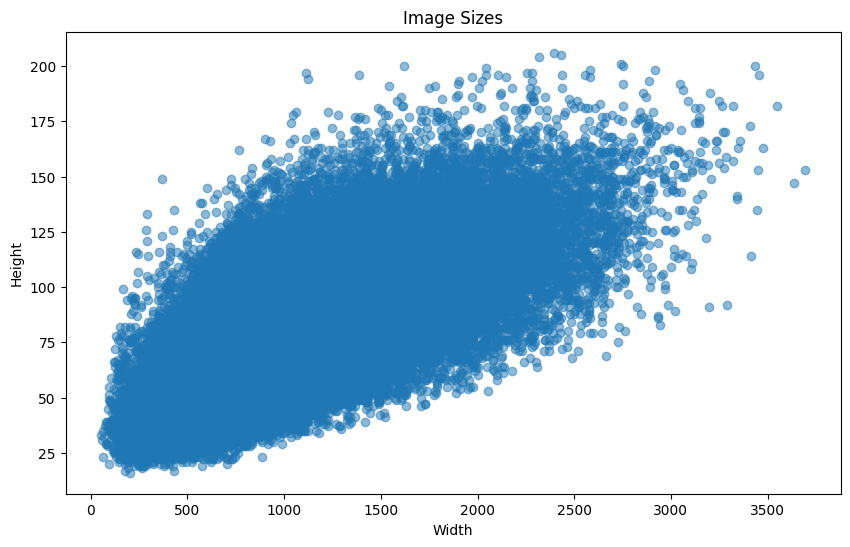

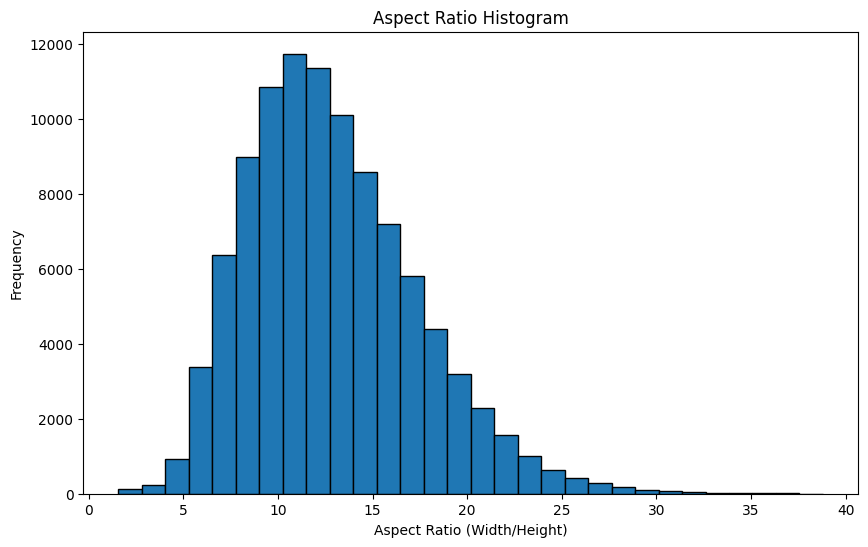

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to your dataset
dataset_path = "/content/Synthetic_Data/"

# Function to compute and display image statistics
def image_statistics(path):
    sizes = []
    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        image_files = os.listdir(fold_path)
        for image_file in image_files:
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)
            sizes.append(img.size)

    sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
    print("Image Statistics:")
    print(sizes_df.describe())

    # Plot image sizes
    plot_image_sizes(sizes_df)

    # Plot aspect ratio histogram
    plot_aspect_ratio_histogram(sizes_df)

def plot_image_sizes(sizes_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes_df['Width'], sizes_df['Height'], alpha=0.5)
    plt.title('Image Sizes')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

def plot_aspect_ratio_histogram(sizes_df):
    aspect_ratios = sizes_df['Width'] / sizes_df['Height']
    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=30, edgecolor='black')
    plt.title('Aspect Ratio Histogram')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')
    plt.show()

# Perform EDA
image_statistics(dataset_path)

In [ ]:
dataset_test_path = "/content/drive/MyDrive/public_test/images"
image_statistics(dataset_test_path)

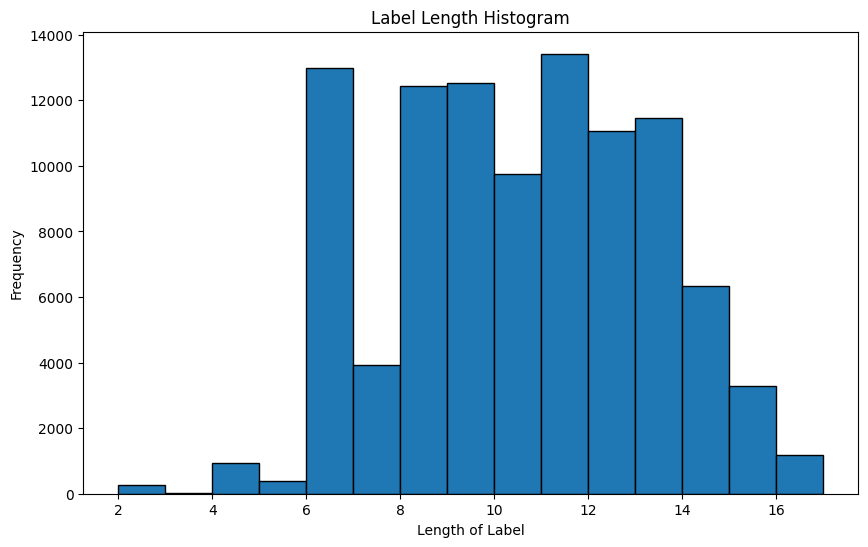

In [ ]:
import matplotlib.pyplot as plt

# Read data from file
file_path = "/content/drive/MyDrive/synthe_labels.txt"  # Replace with the actual path to your file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Extract label lengths
label_lengths = [len(line.split('\t')[1].strip().split()) for line in data]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(label_lengths, bins=15, edgecolor='black')
plt.title('Label Length Histogram')
plt.xlabel('Length of Label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import random
# Function to load and display random images
def display_random_images(path, num_images=5):
    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        image_files = random.sample(os.listdir(fold_path), num_images)

        plt.figure(figsize=(15, 5))
        for i, image_file in enumerate(image_files, 1):
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)

            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.title(f"Image {i}")
            plt.axis('off')

        plt.show()
display_random_images(dataset_path, num_images=5)

In [ ]:
max_length_text = ""
i=1
with open("/content/drive/MyDrive/synthe_labels.txt", "r", encoding="utf-8") as file:
  lines = file.readlines()
  for line in lines:
    text = line.strip().split("\t")[1]
    if len(text)>len(max_length_text):
      max_length_text = text
print(len(max_length_text))

68


## Prepare Dataset for training

In [ ]:
import os

# Set the path to the folder containing annotation files
folder_path = "/content/drive/MyDrive/training_data/annotations"

# Create an empty string to store concatenated content
concatenated_content = ""

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            # Read the content of each file and append to the concatenated string
            file_content = file.read().strip()
            concatenated_content += file_content + '\n'

# Set the path for the output concatenated file
output_path = "/content/drive/MyDrive/training_data/labels.txt"

# Write the concatenated content to the output file
with open(output_path, 'w', encoding='utf-8') as output_file:
    output_file.write(concatenated_content)

print(f"Concatenation completed. Output file: {output_path}")

Concatenation completed. Output file: /content/drive/MyDrive/training_data/labels.txt


In [ ]:
import os
import random

# Set the path to the annotation file
# annotation_file_path = "/content/drive/MyDrive/training_data/labels.txt"
annotation_file_path = "/content/drive/MyDrive/synthe_labels.txt"

# Set the ratio for splitting (e.g., 80% train, 20% val)
train_ratio = 0.8

# Read the content of the annotation file
with open(annotation_file_path, 'r', encoding='utf-8') as annotation_file:
    annotations = annotation_file.readlines()

# Shuffle the annotations before splitting
random.shuffle(annotations)

# Split the annotations into training and validation sets
num_annotations = len(annotations)
num_train = int(num_annotations * train_ratio)

train_annotations = annotations[:num_train]
val_annotations = annotations[num_train:]

# Set the paths for the output train and val files
train_output_path = "/content/drive/MyDrive/synthetic_label/train.txt"
val_output_path = "/content/drive/MyDrive/synthetic_label/val.txt"

# Write the training annotations to the output file
with open(train_output_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_annotations)

# Write the validation annotations to the output file
with open(val_output_path, 'w', encoding='utf-8') as val_file:
    val_file.writelines(val_annotations)

print(f"Splitting and saving completed. Train file: {train_output_path}, Val file: {val_output_path}")

Splitting and saving completed. Train file: /content/drive/MyDrive/synthetic_label/train.txt, Val file: /content/drive/MyDrive/synthetic_label/val.txt


## Train Model

In [3]:
# %cd /content/drive/MyDrive
%cd /content
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

/content
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47563, done.
remote: Counting objects: 100% (804/804), done.
remote: Compressing objects: 100% (366/366), done.
remote: Total 47563 (delta 519), reused 648 (delta 433), pack-reused 46759
Receiving objects: 100% (47563/47563), 345.21 MiB | 26.78 MiB/s, done.
Resolving deltas: 100% (33387/33387), done.


In [4]:
# %cd /content/drive/MyDrive/PaddleOCR
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install paddlepaddle-gpu

/content/PaddleOCR
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.7 MB/s eta 0:00:00
  Attempting 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.5/542.5 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00


### Setup the config.yml

In [ ]:
%cd content/
!wget -P . /pretrain_model/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams

[Errno 2] No such file or directory: 'content/'
/content/PaddleOCR
/pretrain_model/: Scheme missing.
--2023-11-01 03:58:39--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16255295 (16M) [application/octet-stream]
Saving to: ‘./MobileNetV3_large_x0_5_pretrained.pdparams.1’

MobileNetV3_large_x 100%[===================>]  15.50M  4.03MB/s    in 18s     

2023-11-01 03:58:59 (875 KB/s) - ‘./MobileNetV3_large_x0_5_pretrained.pdparams.1’ saved [16255295/16255295]

FINISHED --2023-11-01 03:58:59--
Total wall clock time: 20s
Downloaded: 1 files, 16M in 18s (875 KB/s)


In [5]:
import yaml

with open("configs/rec/rec_mv3_tps_bilstm_ctc.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 73,
    'eval_batch_step':[0,5000],
    'print_batch_step':10,
    'save_model_dir': '/content/drive/MyDrive/output/rec/rec_mv3_tps_bilstm_ctc/',
    'pretrained_model': '/content/drive/MyDrive/output/rec/rec_mv3_tps_bilstm_ctc/iter_epoch_7.pdparams',
    'character_dict_path':'ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':1,
    'use_space_char':True,
    'max_text_length':100,
    'log_smooth_window':80

})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/Synthetic_Data/',
    'label_file_list': ['/content/drive/MyDrive/synthetic_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/Synthetic_Data/',
    'label_file_list': ['/content/drive/MyDrive/synthetic_label/val.txt'],
})
config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 0.5,
    'model_name': 'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':64,
})
config['Eval']['loader'].update({
    'batch_size_per_card':64,
})
with open("configs/rec/rec_mv3_tps_bilstm_ctc.yml", "w") as f:
    yaml.safe_dump(config, f)

### Train your Model 🏋️‍♀️

In [ ]:
# %cd /content/drive/MyDrive/PaddleOCR
%cd /content/PaddleOCR
!python3 tools/train.py -c /content/PaddleOCR/configs/rec/rec_mv3_tps_bilstm_ctc.yml


/content/PaddleOCR
[2023/11/01 05:19:11] ppocr INFO: Architecture : 
[2023/11/01 05:19:12] ppocr INFO:     Backbone : 
[2023/11/01 05:19:12] ppocr INFO:         model_name : large
[2023/11/01 05:19:12] ppocr INFO:         name : MobileNetV3
[2023/11/01 05:19:12] ppocr INFO:         scale : 0.5
[2023/11/01 05:19:12] ppocr INFO:     Head : 
[2023/11/01 05:19:12] ppocr INFO:         fc_decay : 0.0004
[2023/11/01 05:19:12] ppocr INFO:         name : CTCHead
[2023/11/01 05:19:12] ppocr INFO:     Neck : 
[2023/11/01 05:19:12] ppocr INFO:         encoder_type : rnn
[2023/11/01 05:19:12] ppocr INFO:         hidden_size : 96
[2023/11/01 05:19:12] ppocr INFO:         name : SequenceEncoder
[2023/11/01 05:19:12] ppocr INFO:     Transform : 
[2023/11/01 05:19:12] ppocr INFO:         loc_lr : 0.1
[2023/11/01 05:19:12] ppocr INFO:         model_name : small
[2023/11/01 05:19:12] ppocr INFO:         name : TPS
[2023/11/01 05:19:12] ppocr INFO:         num_fiducial : 20
[2023/11/01 05:19:12] ppocr INF

### Evaluation

In [ ]:
%cd /content/PaddleOCR
!python3 /content/PaddleOCR/tools/eval.py -c ./configs/rec/rec_mv3_tps_bilstm_att.yml

### Prediction

In [ ]:
!unzip "/content/drive/MyDrive/training_data.zip" -d ""

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11411.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11412.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11413.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11414.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11415.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11416.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11417.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11418.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_11419.jpg  
  inflating: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_1142.jpg  
  inflating: /

In [ ]:
path = 'Global.infer_img=/content/PaddleOCR/public_test_data/new_public_test'
!python3 tools/infer_rec.py -c ./configs/rec/rec_r45_abinet.yml -o "$path"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[2023/08/31 09:05:22] ppocr INFO: 	 result: QUẾT	0.9999984502792358
[2023/08/31 09:05:22] ppocr INFO: infer_img: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_775.jpg
[2023/08/31 09:05:22] ppocr INFO: 	 result: Bẩu	0.9999670386314392
[2023/08/31 09:05:22] ppocr INFO: infer_img: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_7750.jpg
[2023/08/31 09:05:22] ppocr INFO: 	 result: GIÔNG	0.9964094161987305
[2023/08/31 09:05:22] ppocr INFO: infer_img: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_7751.jpg
[2023/08/31 09:05:22] ppocr INFO: 	 result: Khoeo	0.9999985694885254
[2023/08/31 09:05:22] ppocr INFO: infer_img: /content/PaddleOCR/public_test_data/new_public_test/public_test_img_7752.jpg
[2023/08/31 09:05:22] ppocr INFO: 	 result: xuchiêng	0.9999986886978149
[2023/08/31 09:05:22] ppocr INFO: infer_img: /content/PaddleOCR/public_test_data/new_public_test/public_test_im

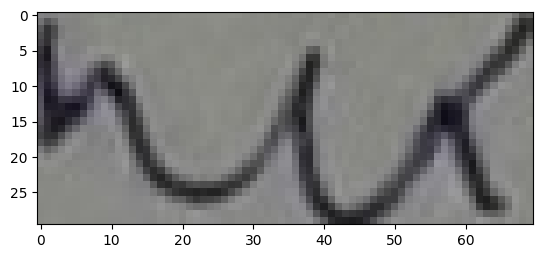

In [ ]:
import cv2
img = cv2.imread("/content/PaddleOCR/public_test_data/new_public_test/public_test_img_10105.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
with open("./output/rec/predict.txt", "r", encoding='utf-8') as f_read, \
     open("prediction.txt", 'w', encoding='utf-8') as f_write:
     lines = f_read.readlines()
     for line in lines:
        e = line.split('\t')
        print(e)
        predict = e[0].split('/')[-1]+' '+e[1]+"\n"
        f_write.write(predict)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_5499.jpg', 'MỒM', '0.9999842643737793\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_55.jpg', 'TRÌU', '0.9999637603759766\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_550.jpg', 'Đũi', '0.9633064270019531\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_5500.jpg', 'NGHỈNH', '0.999971330165863\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_5501.jpg', 'XÌNH', '0.9999985098838806\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_5502.jpg', 'Trứ', '0.8843935132026672\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_5503.jpg', 'CHÉNG', '0.9999887347221375\n']
['/content/PaddleOCR/public_test_data/new_public_test/public_test_img_5504.jpg', 'HĂNG', '0.9999793767929077\n']
['/content/PaddleOCR/public_test_data/new_p

### Check and Clean data

In [ ]:
!unzip "/content/drive/MyDrive/training_data.zip" -d "/content/PaddleOCR/train_data"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95500.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95501.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95502.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95503.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95504.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95505.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95506.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95507.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95508.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95509.png  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_9551.jpg  
  inflating: /content/PaddleOCR/train_data/new_train/train_img_95510.png  
  inflating: /content/PaddleOCR/train_data/n

In [ ]:
import yaml

with open("/content/PaddleOCR/configs/rec/rec_r45_abinet.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'pretrained_model': '/content/drive/MyDrive/output/rec/r45_abinet6/best_model/model.pdparams',
    'character_dict_path':'ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt'
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/PaddleOCR/train_data/new_train/',
    'label_file_list': ['./train_data/train_gt.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/PaddleOCR/train_data/new_train/',
    'label_file_list': ['./train_data/train_gt.txt'],
})

with open("/content/PaddleOCR/configs/rec/rec_r45_abinet.yml", "w") as f:
    yaml.safe_dump(config, f)

In [ ]:
path = 'Global.infer_img=/content/PaddleOCR/train_data/new_train/'
!python3 tools/infer_rec.py -c ./configs/rec/rec_r45_abinet.yml -o "$path"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[2023/09/04 10:35:29] ppocr INFO: 	 result: an	0.9999988675117493
[2023/09/04 10:35:29] ppocr INFO: infer_img: /content/PaddleOCR/train_data/new_train/train_img_9775.jpg
[2023/09/04 10:35:29] ppocr INFO: 	 result: XANHĐICA	0.9956053495407104
[2023/09/04 10:35:29] ppocr INFO: infer_img: /content/PaddleOCR/train_data/new_train/train_img_97750.png
[2023/09/04 10:35:30] ppocr INFO: 	 result: chống	0.9999756813049316
[2023/09/04 10:35:30] ppocr INFO: infer_img: /content/PaddleOCR/train_data/new_train/train_img_97751.png
[2023/09/04 10:35:30] ppocr INFO: 	 result: chê	0.9224074482917786
[2023/09/04 10:35:30] ppocr INFO: infer_img: /content/PaddleOCR/train_data/new_train/train_img_97752.png
[2023/09/04 10:35:30] ppocr INFO: 	 result: đich	0.9159685373306274
[2023/09/04 10:35:30] ppocr INFO: infer_img: /content/PaddleOCR/train_data/new_train/train_img_97753.png
[2023/09/04 10:35:30] ppocr INFO: 	 result: niêm	0.9998505115509033
[2023/09/

In [ ]:
with open("./output/rec/predict.txt", "r", encoding='utf-8') as f_read, \
     open("prediction.txt", 'w', encoding='utf-8') as f_write:
     lines = f_read.readlines()
     for line in lines:
        e = line.split('\t')
        print(e)
        predict = e[0].split('/')[-1]+' '+e[1]+"\n"
        f_write.write(predict)

In [ ]:
with open("prediction.txt", "r", encoding='utf-8') as f_pred, \
     open("/content/PaddleOCR/train_data/train_gt.txt", 'r', encoding='utf-8') as f_truth,\
     open("diff.txt", 'w', encoding='utf-8') as f_write:
     line_preds = f_pred.readlines()
     line_truths = f_truth.readlines()
     for line_pred in line_preds:
      img_pred = line_pred.split(" ")[0]
      pred = line_pred.split(" ")[1]
      for line_truth in line_truths:
          img_truth = line_truth.split("\t")[0]
          if img_pred == img_pred:
            truth = line_truth.split("\t")[1]
            if truth !=pred:
              line = img_truth +" "+truth+" "+pred+"\n"
              f_write.write(line)



KeyboardInterrupt: ignored